In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import shapiro
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_Xy(num=1, to_numpy=False):
    X = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_X.csv', header=None, sep=' ')
    y = pd.read_csv(f'/content/drive/MyDrive/data/task1_{num}_learn_y.csv', header=None, sep=' ')[0]
    if to_numpy:
        return X.to_numpy(), y.to_numpy()
    return X, y

def draw_stats(X, y):
    sns.heatmap(X.corr())
    # data = X.copy()
    # data['answers'] = y
    # sns.pairplot(data=data, hue='answers')

def NUM(y_true, y_pred):
    return np.sum([y_pred != y_true])

def ASY_1(y_true, y_pred):
    P = np.array([[-9, 9], [1, 0]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

def ASY_2(y_true, y_pred):
    P = np.array([[-1, 3], [2, -1]])
    k = 0
    for i, j in zip(y_true, y_pred):
        k += P[int(i), int(j)]
    return k

In [ ]:
X_train, y_train = get_Xy(num=5)

Посмотрим на данные и некоторые их характеристики.

In [ ]:
X_train.shape

(1000, 5000)

Посмотрим на дисбаланс классов.

In [ ]:
y_train.mean()

0.373

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.397244,-31.640756,337.509565,-80.211951,-432.897879,-222.501016,80.052429,112.025860,131.520400,-30.852498,...,-38.663762,-195.030391,-50.991808,29.876770,-124.733265,50.138789,64.692344,231.722366,-52.849583,10.807817
std,586.668373,1579.468326,7669.844121,7676.136804,8133.469010,4896.377382,8109.485640,2760.382669,3323.079435,3175.248513,...,8601.122948,7355.672280,1614.939697,2613.312143,5976.169052,643.903254,2261.394749,8492.512577,4694.696445,1382.515984
min,-1708.881491,-4871.907355,-23342.140569,-27304.909423,-28220.716976,-17237.081359,-24357.786418,-8582.726894,-10729.571272,-11090.476189,...,-26139.122988,-21276.231920,-5168.422612,-8713.020989,-20835.311070,-1966.337690,-8386.258799,-28261.682486,-18102.960963,-4535.661403
25%,-409.380289,-1155.557313,-4588.758866,-5400.821451,-6344.239044,-3647.103979,-5448.097258,-1807.322900,-2217.467849,-2141.254360,...,-5931.968501,-5361.446220,-1169.742969,-1651.930198,-3988.248415,-399.488920,-1492.802243,-5407.533927,-3223.292789,-920.628444
50%,26.372848,-62.650947,601.145313,-67.087834,-469.054055,-273.028233,146.836831,236.743322,70.030097,76.104734,...,37.697760,-579.928777,-69.255736,-42.812485,-189.724033,41.220271,112.419776,137.028407,-96.477591,-16.421400
75%,392.799650,1093.900327,5257.485594,5327.918622,5130.318384,3157.359587,5129.167298,1959.623471,2371.276431,2073.675113,...,6186.990650,4702.491513,1003.829213,1767.723700,3848.567046,499.563765,1507.081023,5533.706165,3082.611137,958.209695
max,2216.168574,4389.989626,27060.453412,21473.324599,22972.865035,16855.489663,28354.320860,8597.346778,9562.905815,10600.142038,...,31842.916754,23516.286493,5639.150378,8303.592779,20790.262842,2071.943364,7403.080250,24185.561410,14183.167284,4901.595012


In [ ]:
Xy = X_train.copy()
Xy['label'] = y_train.values.astype('int32')
Xy.shape

(1000, 5001)

In [ ]:
Xy.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,label
0,261.861151,-1969.199307,3031.886766,-8954.365566,-14661.507712,-4197.830057,-3507.666783,-1557.136438,2266.862087,134.332747,...,5538.213067,2.608508,-1737.864510,-3050.809333,-66.489335,-2677.205058,-990.299990,-2672.968132,-708.676171,1
1,-367.924250,119.232960,10548.874022,-3504.457706,-1133.387914,-1527.419755,-68.138486,1349.963432,4724.047044,16.669160,...,-4854.713048,389.469813,-3499.066499,-252.103170,-399.565679,-4355.896098,2503.965327,7350.504997,204.239447,1
2,-461.468950,-3354.453969,-1513.132059,1341.685853,2189.242382,166.362536,7625.210541,-2337.377591,624.718602,1638.656542,...,-1609.183814,2470.950206,-2780.674873,2071.928002,75.069626,2903.230354,1553.016102,-3608.990410,1428.596428,1
3,113.336614,462.535881,-8373.304960,-4094.647026,-2209.303161,-6061.473686,-9479.202313,756.884631,-3891.032839,1303.128185,...,-10384.729194,-973.546167,2476.957669,4531.756333,-1141.525338,-1454.254335,-4696.120096,-4865.830697,669.725567,0
4,1027.089843,1168.485511,4535.909834,6008.297512,10165.543808,-1271.678269,10469.877106,-1164.074628,-2739.062310,1854.340150,...,-5540.387783,-175.019656,2280.916050,7682.063844,-384.847202,-3944.649825,-7996.811512,-5366.975705,-1042.559369,0


<Axes: >

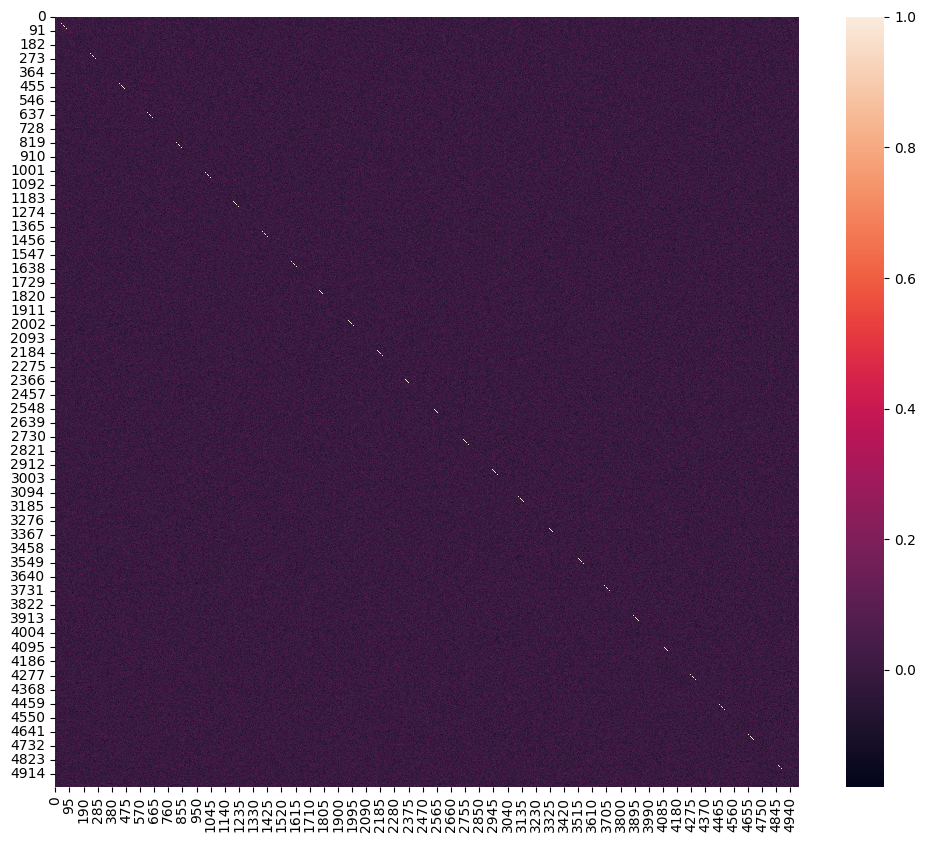

In [ ]:
corr_matrix = Xy.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)

Проверим, распределены ли признаки нормально для каждого класса внутри столбца, с помощью критерия Шапиро. И посмотрим на отличия в распределении фичей для классов с помощью дивергенции Куйбака-Лейбнера.


In [ ]:
KLs = []
pos_ind = np.where(y_train == 1)[0]
neg_ind = np.where(y_train == 0)[0]

for col in X_train.columns:
    X_0 = X_train.loc[neg_ind, col].values
    X_1 = X_train.loc[pos_ind, col].values
    shapiro_0 = shapiro(X_0)[0]
    shapiro_1 = shapiro(X_1)[0]
    mu_0, std_0 = norm.fit(X_0)
    mu_1, std_1 = norm.fit(X_1)

    KL_div = np.log(std_1 / std_0) + (std_0**2 + (mu_0 - mu_1)**2)/(std_1**2) - 1
    print("KL_div: %.3f, Shapiro_ps: (%.3f, %.3f), N(%.3f, %3f), N(%.3f, %3f)"
          %(KL_div, shapiro_0, shapiro_1, mu_0, std_0, mu_1, std_1))
    KLs.append(KL_div)

In [ ]:
top_KL_cols = X_train.columns[np.argsort(np.array(KLs))][::-1][:20]

<Axes: >

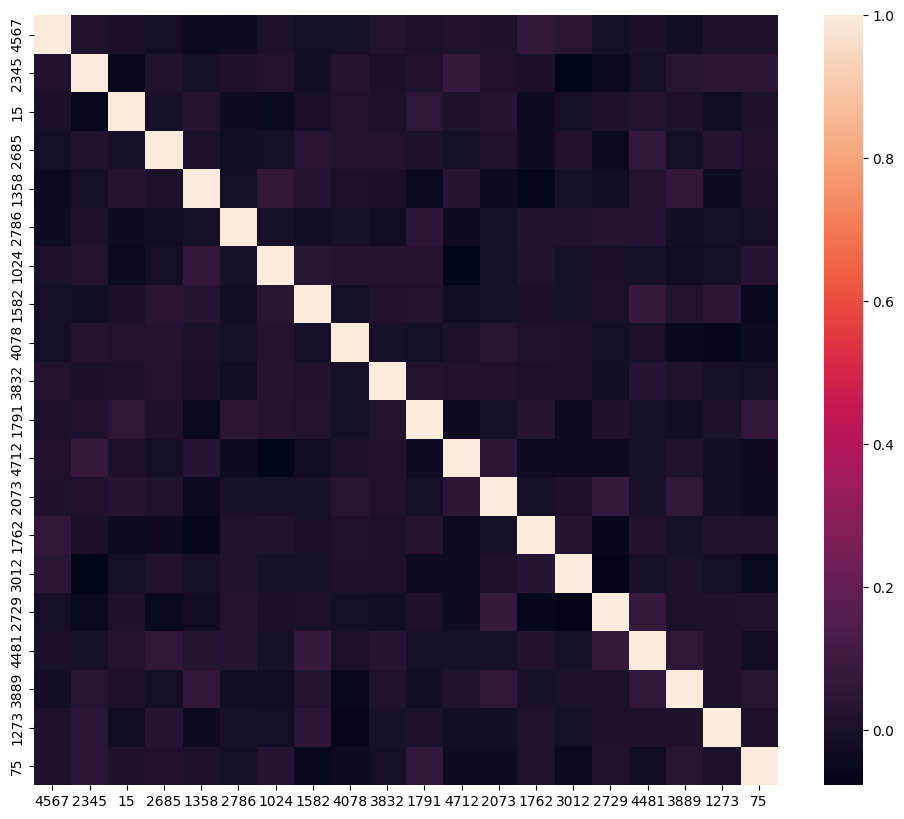

In [ ]:
corr_part_matrix = Xy[top_KL_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_part_matrix)

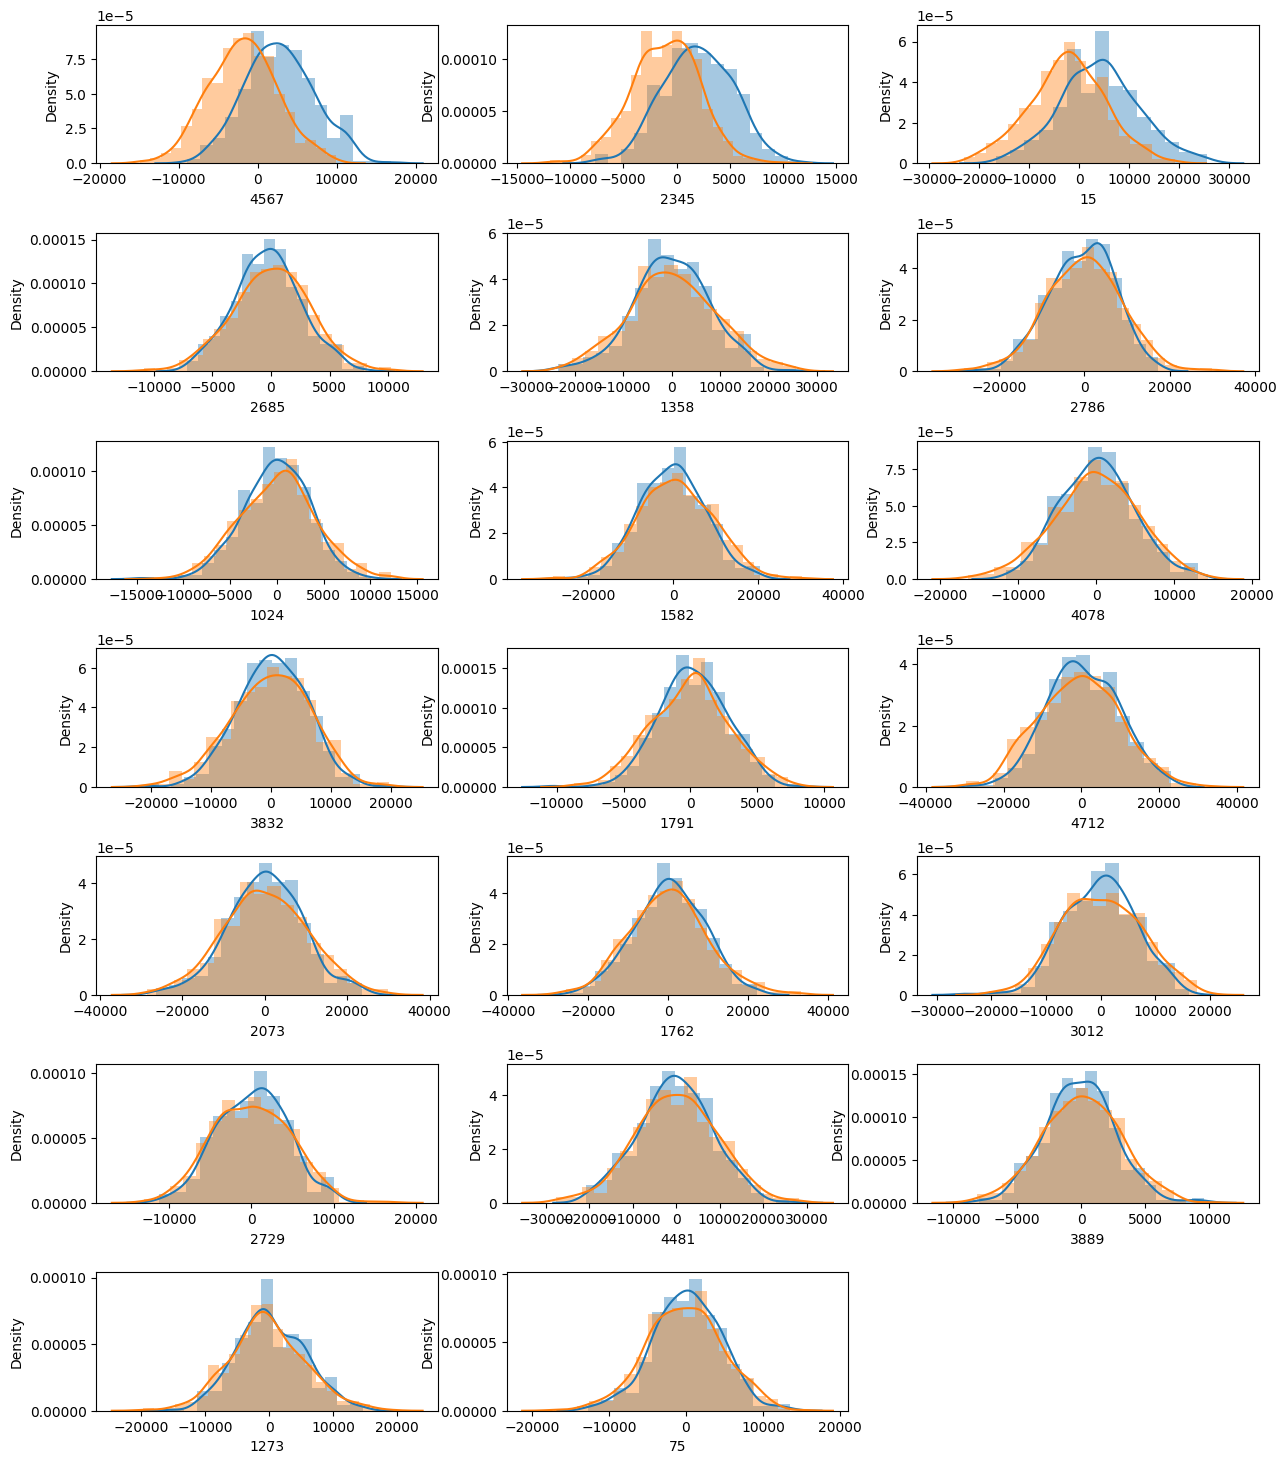

In [ ]:
fig, axs = plt.subplots(7, 3, figsize=(15, 18))
plt.subplots_adjust(hspace=0.5)

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axs = trim_axs(axs, len(top_KL_cols))

for i, col in enumerate(X_train[top_KL_cols].columns):
    sns.distplot(X_train[top_KL_cols][col][y_train==1], ax=axs[i])
    sns.distplot(X_train[top_KL_cols][col][y_train==0], ax=axs[i])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB

In [ ]:
import tqdm

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
def threshold_func(model, X, y):
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm.tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y.values])
        nums.append(num)

        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)

    loc_min = np.argmin(nums)
    num_thres = thresholds[loc_min]
    axs[0].plot(thresholds, nums, c='C0', lw=1.5, label='NUM, p=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].legend();

    loc_min = np.argmin(acy1s)
    acy1_thres = thresholds[loc_min]
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5, label='ACY1, p=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].legend();

    loc_min = np.argmin(acy2s)
    acy2_thres = thresholds[loc_min]
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5, label='ACY2, p=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].legend();

    return num_thres, acy1_thres, acy2_thres

In [ ]:
model = GaussianNB()

res = []
for i in range(1, len(top_KL_cols) + 1):
    res_i = np.mean(cross_val_score(model, X_train[top_KL_cols[:i]], y_train, scoring='roc_auc', cv=10))
    res.append(res_i)

best_k = np.argmax(res) + 1

In [ ]:
best_k

3

In [ ]:
X = X_train[top_KL_cols[:best_k]]
new_col = X_train[top_KL_cols[best_k:]].sum(axis=1)
X[best_k] = new_col

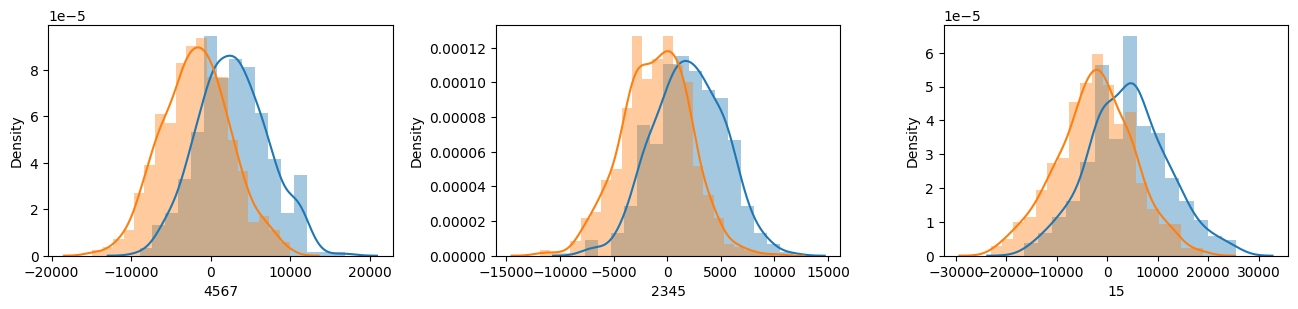

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3))
plt.subplots_adjust(wspace=0.3)
for i, col in enumerate(X_train[top_KL_cols].columns[:best_k]):
    sns.distplot(X_train[top_KL_cols][col][y_train==1], ax=axs[i])
    sns.distplot(X_train[top_KL_cols][col][y_train==0], ax=axs[i])

100%|██████████| 501/501 [00:02<00:00, 217.10it/s]


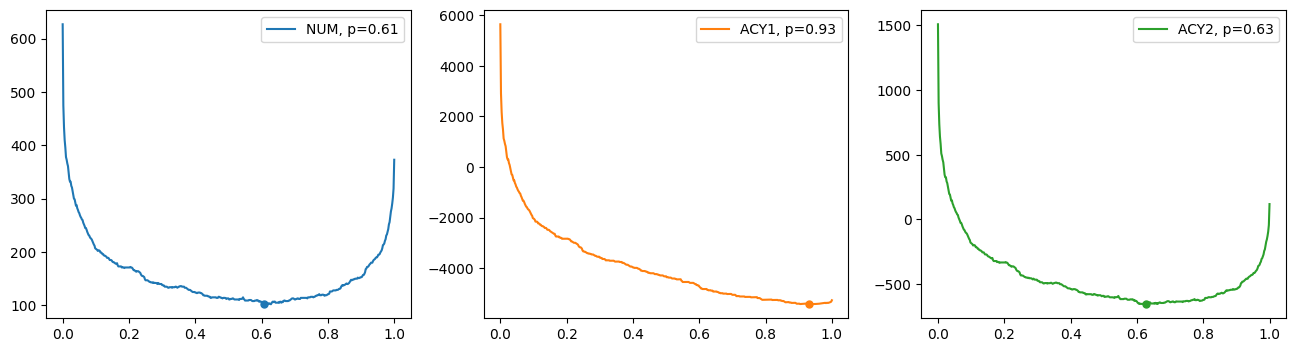

In [ ]:
model = LogisticRegression()
num_thres, acy1_thres, acy2_thres = threshold_func(model, X, y_train)

In [ ]:
def thres_num(clf, X, y):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    return np.sum([y_pred!=y.values])

def thres_roc_auc(clf, X, y):
    y_proba_pred = clf.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba_pred)

def thres_acy1(clf, X, y):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
    return acy1

def thres_acy2(clf, X, y):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x>thres) for x in y_proba_pred])
    conf_mat = confusion_matrix(y, y_pred)
    acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
    return acy2

In [ ]:
nb = GaussianNB()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(nb, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(nb, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(nb, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(nb, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.9642882471042473, 'NUM': 102, 'ASY1': -5429, 'ASY2': -655}


In [ ]:
model = LogisticRegression()

metrics = {}
metrics["ROC_AUC"] = np.mean(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_roc_auc, cv=skf))
metrics["NUM"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_num, cv=skf))
metrics["ASY1"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy1, cv=skf))
metrics["ASY2"] = np.sum(cross_val_score(model, X_train[top_KL_cols[:best_k]], y_train, scoring=thres_acy2, cv=skf))
print(metrics)

{'ROC_AUC': 0.9648460643500643, 'NUM': 96, 'ASY1': -5448, 'ASY2': -675}


In [ ]:
model = GaussianNB()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[top_KL_cols[:3]], y_train, cv=3, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
gaussian_nb = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.96757895 0.96179966 0.95118846]
Mean roc_auc: 0.9601890209394455

Metric: NUM: [31 38 48]
Sum NUM: 117

Metric: ASY_1: [-1714 -1690 -1697]
Sum ASY_1: -5101

Metric: ASY_2: [-233 -210 -181]
Sum ASY_2: -624



In [ ]:
model = LogisticRegression()
scoring = {
    "roc_auc": "roc_auc",
    "NUM": make_scorer(NUM),
    "ASY_1": make_scorer(ASY_1),
    "ASY_2": make_scorer(ASY_2)
}

info_train = cross_validate(model, X_train[top_KL_cols[:3]], y_train, cv=3, n_jobs=8,
                            scoring=scoring,
                            return_estimator=True)

score_train_valid = info_train["test_roc_auc"]
logreg = info_train['estimator'][np.argmax(score_train_valid)]

for metric in scoring:
    value = info_train["test_" + metric]
    print(f"Metric: {metric}: {value}")
    if metric == "roc_auc":
        print(f"Mean roc_auc: {np.mean(value)}")
    else:
        print(f"Sum {metric}: {np.sum(value)}")
    print()

Metric: roc_auc: [0.97324402 0.96403766 0.95516283]
Mean roc_auc: 0.9641481710140454

Metric: NUM: [26 34 39]
Sum NUM: 99

Metric: ASY_1: [-1600 -1490 -1638]
Sum ASY_1: -4728

Metric: ASY_2: [-241 -210 -204]
Sum ASY_2: -655



In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/data/task1_5_test_X.csv", delimiter=' ', header=None)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-8.105408,16.215305,-71.629312,-19.823442,-100.475455,-37.301753,-31.619328,39.455327,30.997352,-79.795067,...,-41.357811,-77.968192,-2.999195,32.386005,-10.591765,-2.033830,-7.276709,-128.393298,11.835360,4.761979
std,586.693057,1530.112917,7474.465933,7877.155734,8310.010707,4966.499507,8324.187349,2752.140597,3303.788730,3205.509119,...,8924.995061,7431.516373,1599.277180,2534.248741,6066.889407,623.316858,2229.141719,8674.699172,4684.238725,1391.975324
min,-2147.046427,-6516.446334,-26721.739581,-36060.609543,-33209.430682,-19989.218351,-29907.004703,-9104.009995,-12070.994884,-12766.010824,...,-33426.750259,-29051.369701,-5773.537435,-9133.134895,-24577.614968,-2379.905187,-7984.247103,-39021.256974,-20026.118076,-5837.003008
25%,-405.802247,-1010.924739,-5196.041153,-5325.640267,-5715.761239,-3374.284341,-5542.330039,-1827.747463,-2197.202925,-2231.835219,...,-6139.857160,-5106.229183,-1068.915192,-1645.568847,-4089.492138,-420.208161,-1500.120433,-5971.139406,-3174.460730,-910.987238
50%,-10.757493,-9.090749,-25.476106,-14.427085,-113.458019,-127.521588,17.572982,21.970170,-2.363598,-58.699990,...,-133.652959,15.882830,-8.298419,45.104471,-64.386993,2.574414,-8.198940,-140.250928,72.356833,20.506562
75%,380.661655,1059.422558,4983.280191,5350.157479,5357.006398,3308.135527,5554.229846,1900.292405,2295.272054,2076.546802,...,5916.543831,4976.760120,1071.294571,1714.279802,4119.551656,419.711646,1526.901848,5615.344487,3182.812947,943.223577
max,2199.872379,5575.244719,28053.193041,32171.784971,32020.301371,25903.341771,29878.859209,11287.347687,12311.519315,11924.212797,...,40088.038779,29060.047266,5736.599661,10081.574048,22036.048983,2231.367826,7378.952145,35877.233002,16996.326014,5801.029324


In [ ]:
def num_predict(clf, X):
    thres = num_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def roc_auc_predict(clf, X):
    y_pred = clf.predict(X)
    return y_pred

def acy1_predict(clf, X):
    thres = acy1_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

def acy2_predict(clf, X):
    thres = acy2_thres
    y_proba_pred = clf.predict_proba(X)[:,1]
    y_pred = np.array([int(x > thres) for x in y_proba_pred])
    return y_pred

model = GaussianNB()
model_1 = LogisticRegression()
model = model.fit(X_train[top_KL_cols[:best_k]], y_train)
model_1 = model_1.fit(X_train[top_KL_cols[:best_k]], y_train)
roc_auc = model_1.predict_proba(X_test[top_KL_cols[:best_k]])[:, 1]
num = num_predict(model_1, X_test[top_KL_cols[:best_k]])
acy1 = acy1_predict(model_1, X_test[top_KL_cols[:best_k]])
acy2 = acy2_predict(model_1, X_test[top_KL_cols[:best_k]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = roc_auc

out.to_csv("task1_5_ans.csv", index=False, sep=',')

In [ ]:
roc_auc = logreg.predict_proba(X_test[top_KL_cols[:best_k]])[:, 1]
num = logreg.predict(X_test[top_KL_cols[:best_k]])
acy1 = gaussian_nb.predict(X_test[top_KL_cols[:best_k]])
acy2 = logreg.predict(X_test[top_KL_cols[:best_k]])

out = pd.DataFrame(data = np.array([roc_auc, num, acy1, acy2]).T.astype('int32'), columns=["AUC", "NUM", "ASY1", "ASY2"])
out["AUC"] = logreg.predict_proba(X_test[top_KL_cols[:best_k]])[:, 1]

out.to_csv("task1_5_ans.csv", index=False, sep=',')